## Week 1

In [76]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Read in police call data for 2013

In [4]:
police_2013 = pd.read_csv('data/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2013.csv')
police_2013.head()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201300000001,01/01/2013 12:00:00 AM,20130000003,C,15,Community Policing Activity,P,PROGRESS,15,COMMUNITY POLICING,0,11TH AV N / CHARLOTTE AV,410C,C,11.0,4205,36.162,-86.791,"(36.162, -86.791)"
1,PD201300000004,01/01/2013 12:01:00 AM,20130000005,C,83,Shots Fired,P,PROGRESS,11,DISREGARD / SIGNAL 9,0,HOPEDALE DR / HAYWOOD LN,333C,S,33.0,8711,36.069,-86.716,"(36.069, -86.716)"
2,PD201300000005,01/01/2013 12:01:00 AM,20130000008,C,83,Shots Fired,P,PROGRESS,6,ASSISTED OTHER UNIT,0,10TH AV N / CHEATHAM PL,415C,C,15.0,4327,36.176,-86.797,"(36.176, -86.797)"
3,PD201300000007,01/01/2013 12:02:00 AM,0,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,0,OLDHAM ST / COWAN ST,415C,C,13.0,1989,36.175,-86.776,"(36.175, -86.776)"
4,PD201300000006,01/01/2013 12:02:00 AM,20130000006,C,43,Want Officer for Investigation / Assistance,P,PROGRESS,6,ASSISTED OTHER UNIT,600,SYLVAN ST,2W81,E,11.0,1043,36.168,-86.759,"(36.168, -86.759)"


In [5]:
police_2013.tail()

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
1211705,PD201301344233,12/31/2013 11:57:00 PM,20131202596,NaN,43,Want Officer for Investigation / Assistance,P,PROGRESS,5,GONE ON ARRIVAL,600,ROTHWOOD AV,714C,M,11.0,0,34.153,-92.509,"(34.153, -92.509)"
1211706,PD201301344235,12/31/2013 11:57:00 PM,20131202597,NaN,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,4600,NOLENSVILLE PKE,332C,S,33.0,0,34.153,-92.509,"(34.153, -92.509)"
1211707,PD201301344236,12/31/2013 11:57:00 PM,20140000052,NaN,44,Disorderly Person,P,PROGRESS,5,GONE ON ARRIVAL,3800,CENTRAL PKE,521C,H,21.0,9529,34.153,-92.509,"(34.153, -92.509)"
1211708,PD201301344237,12/31/2013 11:58:00 PM,20140000169,NaN,53,Holdup / Robbery,R,REPORT,1,M.P.D. REPORT COMPLED,1100,AIRPORT CENTER DR,515C,H,17.0,9411,34.153,-92.509,"(34.153, -92.509)"
1211709,PD201301344238,12/31/2013 11:59:00 PM,20140000006,NaN,83,Shots Fired,P,PROGRESS,5,GONE ON ARRIVAL,1700,SEIFRIED ST,6F85,N,11.0,4415,34.153,-92.509,"(34.153, -92.509)"


In [6]:
police_2013.shape

(1211710, 19)

In [7]:
police_2013.columns = ['id', 'call_time', 'complaint_id', 'shift', 'tencode', 
                       'tencode_desc', 'a', 'b', 'disposition', 'disposition_desc',
                      'c', 'd', 'unit', 'sector', 'zone', 'e', 'lat', 'lng', 'f']

In [8]:
police_2013 = police_2013.drop(columns = ['a', 'b', 'c', 'd', 'e', 'f'])

In [9]:
police_2013.head(2)

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
0,PD201300000001,01/01/2013 12:00:00 AM,20130000003,C,15,Community Policing Activity,15,COMMUNITY POLICING,410C,C,11.0,36.162,-86.791
1,PD201300000004,01/01/2013 12:01:00 AM,20130000005,C,83,Shots Fired,11,DISREGARD / SIGNAL 9,333C,S,33.0,36.069,-86.716


#### Unit 423C had 6816 calls, the most in 2013; 365 units had more than 1000 calls in 2013

In [10]:
police_2013.unit.value_counts().head(2)

423C    6816
611C    5902
Name: unit, dtype: int64

In [11]:
sum(police_2013.unit.value_counts() > 1000)

365

#### Most calls in 2013 were for `Traffic Violations`. There were 388,850 calls for this.

In [12]:
police_2013.tencode_desc.value_counts().head(2)

Traffic Violation    388850
Business Check       239471
Name: tencode_desc, dtype: int64

#### Create a dataframe with the count of calls in 2013 for every tencode

In [13]:
crime_counts_2013 = police_2013.tencode_desc.value_counts().to_frame()
crime_counts_2013.reset_index(inplace=True)
crime_counts_2013.columns = ['crime', 'count']

In [14]:
crime_counts_2013.head(10)

,crime,count
0,Traffic Violation,388850
1,Business Check,239471
2,Want Officer for Investigation / Assistance,163571
3,Community Policing Activity,51248
4,Suspicious Person,47585
5,Administrative/Special Assignment,43248
6,Vehicle Accident - Property Damage,32655
7,Disorderly Person,32488
8,Safety Hazard,30270
9,Theft,29767


In [15]:
crime_counts_2013['year'] = 2013

In [16]:
crime_counts_2013.head()

,crime,count,year
0,Traffic Violation,388850,2013
1,Business Check,239471,2013
2,Want Officer for Investigation / Assistance,163571,2013
3,Community Policing Activity,51248,2013
4,Suspicious Person,47585,2013


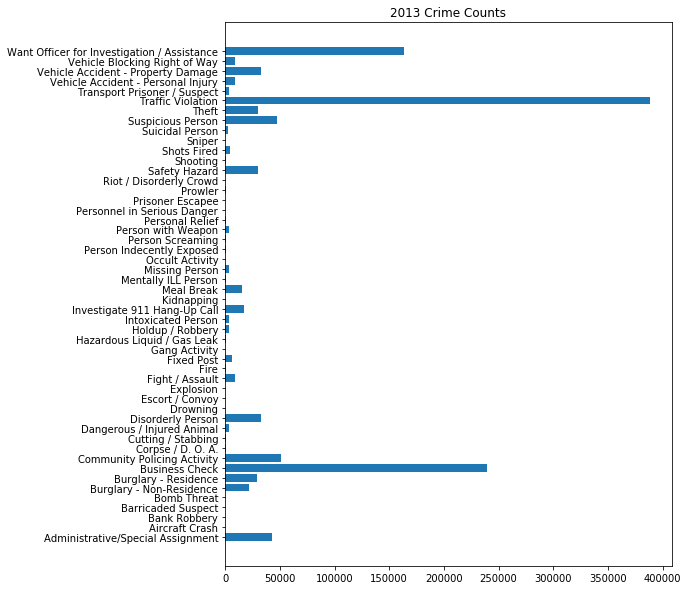

In [17]:
plt.figure(figsize = (8, 10))
plt.barh('crime', 'count', data = crime_counts_2013)
plt.title('2013 Crime Counts');

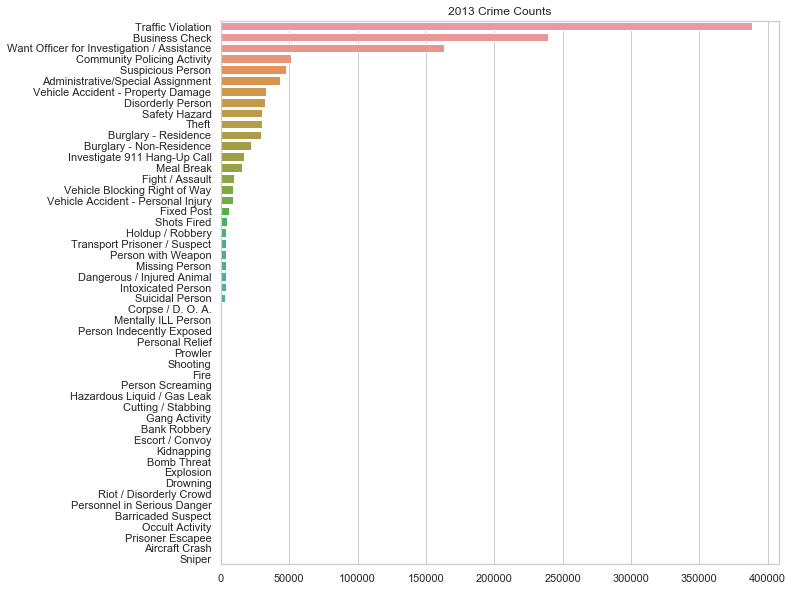

In [18]:
plt.figure(figsize = (10, 10))
sns.set(style="whitegrid")
sns.barplot('count', 'crime', data = crime_counts_2013)
plt.xlabel('')
plt.ylabel('')
plt.title('2013 Crime Counts');

## Week 2

#### Read in police call data for 2018

In [19]:
police_2018 = pd.read_csv('data/Metro_Nashville_Davidson_County_Calls_For_Police_Service__2018.csv')
police_2018.head(2)

,Event Number,Call Received,Complaint Number,Shift,Tencode,Tencode Description,Tencode Suffix,Tencode Suffix Description,Disposition Code,Disposition Description,Block,Street Name,Unit Dispatched,Sector,Zone,Reporting Area (RPA),Latitude,Longitude,Mapped Location
0,PD201800000002,01/01/2018 12:00:00 AM,20180000002,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,0.0,3RD AV N & JEFFERSON ST,7F62,C,13,4311.0,36.175,-86.785,"(36.175, -86.785)"
1,PD201800000003,01/01/2018 12:00:00 AM,20180000003,C,96,Business Check,NaN,NaN,12,LOCATION/BUILDING SECURE,2300.0,8TH AV S,821C,MT,23,6929.0,36.127,-86.778,"(36.127, -86.778)"


In [20]:
police_2018.shape

(747323, 19)

In [21]:
police_2018.columns = ['id', 'call_time', 'complaint_id', 'shift', 'tencode', 
                       'tencode_desc', 'a', 'b', 'disposition', 'disposition_desc',
                      'c', 'd', 'unit', 'sector', 'zone', 'e', 'lat', 'lng', 'f']

In [22]:
police_2018 = police_2018.drop(columns = ['a', 'b', 'c', 'd', 'e', 'f'])

In [23]:
police_2018.head(3)

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
0,PD201800000002,01/01/2018 12:00:00 AM,20180000002,C,96,Business Check,12,LOCATION/BUILDING SECURE,7F62,C,13,36.175,-86.785
1,PD201800000003,01/01/2018 12:00:00 AM,20180000003,C,96,Business Check,12,LOCATION/BUILDING SECURE,821C,MT,23,36.127,-86.778
2,PD201800000004,01/01/2018 12:00:00 AM,20180000004,C,96,Business Check,12,LOCATION/BUILDING SECURE,311C,S,13,36.113,-86.746


#### Unit 125C had 6200 calls, the most in 2018; 271 units had more than 1000 calls in 2018

In [24]:
police_2018.unit.value_counts().head(2)

125C    6200
421C    4983
Name: unit, dtype: int64

In [25]:
sum(police_2018.unit.value_counts() > 1000)

271

#### Create a dataframe with the count of calls in 2018 for every tencode

In [26]:
crime_counts_2018 = police_2018.tencode_desc.value_counts().to_frame()
crime_counts_2018.reset_index(inplace=True)
crime_counts_2018.columns = ['crime', 'count']

In [27]:
crime_counts_2018.head(10)

,crime,count
0,Business Check,156142
1,Traffic Violation,143257
2,Want Officer for Investigation / Assistance,126718
3,Administrative/Special Assignment,41765
4,Community Policing Activity,34511
5,Disorderly Person,30139
6,Suspicious Person,28908
7,Vehicle Accident - Property Damage,28134
8,Theft,27392
9,Safety Hazard,25581


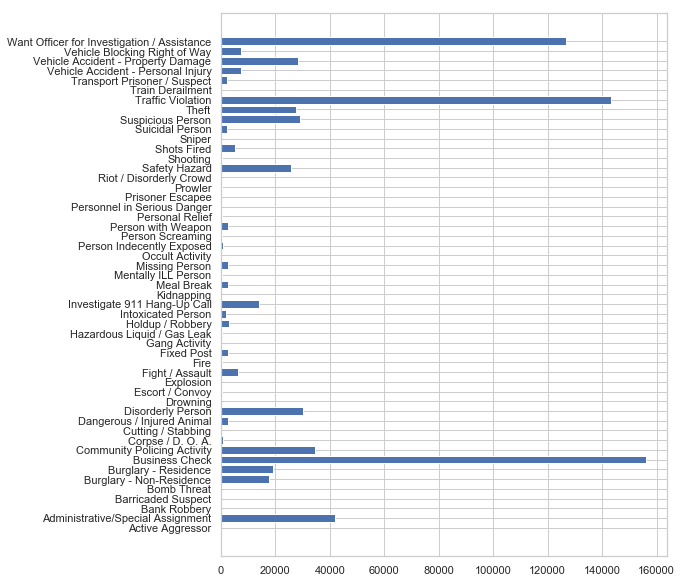

In [28]:
plt.figure(figsize = (8, 10))
plt.barh('crime', 'count', data = crime_counts_2018);

#### 2018 data is missing year-end; remove rows from 2013 for month + day after latest 2018 month + day

In [29]:
police_2018.call_time.max()      #09/21/2018 12:59:58 AM

police_2013 = police_2013.loc[police_2013.call_time < '09/21/2013 12:59:58 AM']

In [30]:
police_2013.call_time.max()

'09/21/2013 12:59:00 AM'

In [31]:
police_2013.shape

(900584, 13)

#### Create a subset of the police call data (for both 2013 and 2018) that includes these five tencodes:
- *Theft*
- *Burglary - Residence*
- *Burglary - Non-Residence*
- *Holdup / Robbery*
- *Bank Robbery*

In [32]:
crime_subset_list = [ 'Theft', 'Burglary - Residence', 
                     'Burglary - Non-Residence', 
                     'Holdup / Robbery', 'Bank Robbery']

In [33]:
crime_subset_2018 = police_2018[police_2018.tencode_desc.isin(crime_subset_list)]
crime_subset_2018.shape

(67324, 13)

In [34]:
crime_subset_2013 = police_2013[police_2013.tencode_desc.isin(crime_subset_list)]
crime_subset_2013.shape

(62197, 13)

#### Add a year column to each data frame and then concatenate them

In [35]:
crime_subset_2018['year'] = 2018
crime_subset_2013.insert(0, 'year', 2013)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
crimes = pd.concat([crime_subset_2013, crime_subset_2018])
crimes.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(129521, 14)

#### Find the counts of each tencode description; collapse categories; get new counts

In [37]:
crimes.tencode_desc.value_counts()

Theft                       49425
Burglary - Residence        40329
Burglary - Non-Residence    33556
Holdup / Robbery             6025
Bank Robbery                  186
Name: tencode_desc, dtype: int64

In [38]:
crimes.tencode_desc = crimes.tencode_desc.map(
    {'Bank Robbery': 'Robbery',
     'Theft': 'Theft', 
     'Burglary - Residence': 'Burglary',
     'Burglary - Non-Residence': 'Burglary',
     'Holdup / Robbery': 'Robbery'})     

In [39]:
crimes.tencode_desc.value_counts()

Burglary    73885
Theft       49425
Robbery      6211
Name: tencode_desc, dtype: int64

#### Create a data frame with year, category, and count of calls for that year and category

In [40]:
#group by year and get counts
aggregated = crimes.groupby(['year', 'tencode_desc']).agg('count').reset_index()

In [41]:
aggregated = aggregated.iloc[0:,0:3]
aggregated.columns = ['year', 'category', 'count']
aggregated

,year,category,count
0,2013,Burglary,37165
1,2013,Robbery,2999
2,2013,Theft,22033
3,2018,Burglary,36720
4,2018,Robbery,3212
5,2018,Theft,27392


#### Facet grid of bar plots to compare years for each crime category

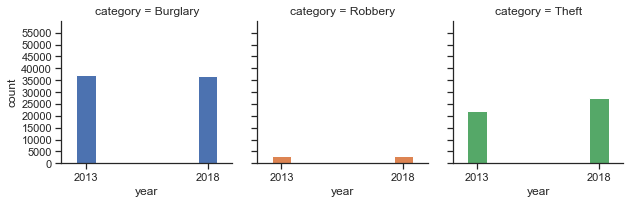

In [42]:
sns.set(style="ticks")

#fig, ax = plt.subplots(figsize = (8, 10))

# Initialize a grid of plots with an Axes for each country
grid = sns.FacetGrid(aggregated, col="category", hue="category", col_wrap=3)

# Draw a line plot to show the trajectory of each country
grid.map(plt.bar, "year", "count")

# # Adjust the tick positions and labels
grid.set(xticks=[2013, 2018], yticks=[0, 5000, 10000, 15000, 20000, 25000, 
                                      30000, 35000, 40000, 45000, 50000, 55000],
        xlim=(2012, 2019), ylim=(0, 60000));

In [43]:
crimes.head(3)

,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
21,01/01/2013 12:09:00 AM,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary,137C,2013,37
24,01/01/2013 12:10:00 AM,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary,VANDY,2013,21
27,01/01/2013 12:10:00 AM,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary,7F80,2013,23


#### Central sector (`C`) had the least number of crimes for 2013 with 3,716

In [44]:
crimes.loc[crimes.year == 2013].sector.value_counts()

W    15093
S    13884
H    11179
E     6841
N     5938
M     5529
C     3716
Name: sector, dtype: int64

#### Central sector (`C`) had the least number of crimes for 2018, too, with 2,772

In [45]:
crimes.loc[crimes.year == 2018].sector.value_counts()

S     9367
MT    9279
H     7863
W     7182
N     6213
E     5651
M     4927
C     2772
Name: sector, dtype: int64

#### 30.7% of calls in 2013 had a disposition of `disregard / signal 9`

In [46]:
len(crimes.loc[(crimes.year == 2013) & (crimes.disposition_desc == 'DISREGARD / SIGNAL 9')])

19000

In [47]:
#crimes.disposition_desc.value_counts()
print(crimes.loc[crimes.year == 2013].shape[0])
crimes.loc[crimes.year == 2013].disposition_desc.value_counts(True)
# print('The percentage of calls that were disposition of disregard is ', 
#      len(crimes.loc[(crimes.year == 2013) & (crimes.disposition_desc == 'DISREGARD / SIGNAL 9')]) / crimes.loc[crimes.year == 2013].shape[0])

62197


DISREGARD / SIGNAL 9             0.306709
M.P.D. REPORT COMPLED            0.279170
LOCATION/BUILDING SECURE         0.151014
ASSISTED OTHER UNIT              0.087267
FALSE CALL                       0.061277
ASSISTED CITIZEN                 0.047265
NO RESPONSE                      0.030332
GONE ON ARRIVAL                  0.014706
ADVISORY / NOTICE FORM GIVEN     0.008733
ARREST, CUSTODIAL OR CITATION    0.003374
CITATION - TRAFFIC               0.003358
ADVISED IN CIVIL CASE            0.002583
ASSISTANCE REFUSED               0.002276
SUBJECT WARNED                   0.001437
COMMUNITY POLICING               0.000500
Name: disposition_desc, dtype: float64

#### 28.2% of calls in 2018 had a disposition of `disregard / signal 9`

In [48]:
print(crimes.loc[crimes.year == 2018].shape[0])
crimes.loc[crimes.year == 2018].disposition_desc.value_counts()

67324


DISREGARD / SIGNAL 9             18993
M.P.D. REPORT COMPLED            18597
LOCATION/BUILDING SECURE         11025
ASSISTED OTHER UNIT               5813
FALSE CALL                        5112
ASSISTED CITIZEN                  2997
NO RESPONSE                       1868
GONE ON ARRIVAL                   1613
ADVISORY / NOTICE FORM GIVEN       349
ASSISTANCE REFUSED                 267
CITATION - TRAFFIC                 240
ARREST, CUSTODIAL OR CITATION      184
ADVISED IN CIVIL CASE              124
COMMUNITY POLICING                  69
SUBJECT WARNED                      62
Name: disposition_desc, dtype: int64

In [49]:
print(18993 / crimes.loc[crimes.year == 2018].shape[0])

0.2821133622482324


### Week 3

In [50]:
nashville = [36.1612, -86.7775]
nashville_map = folium.Map(location = nashville, zoom_start = 12)
nashville_map

In [51]:
robberies = crimes[(crimes.tencode_desc == 'Robbery') &
            (crimes.disposition_desc == 'GONE ON ARRIVAL')]
robberies.head()

,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone
23493,01/07/2013 02:39:00 PM,20130018910,5,GONE ON ARRIVAL,PD201300025565,36.072,-86.638,S,A,53,Robbery,315A,2013,35
66394,01/18/2013 11:36:00 AM,20130053046,5,GONE ON ARRIVAL,PD201300072099,36.280,-86.709,M,A,53,Robbery,720A,2013,23
70399,01/19/2013 04:00:00 PM,20130056279,5,GONE ON ARRIVAL,PD201300076532,36.043,-86.703,S,B,53,Robbery,333B,2013,37
247413,03/10/2013 08:57:00 PM,20130232812,5,GONE ON ARRIVAL,PD201300269780,34.153,-92.509,N,B,53,Robbery,627B,2013,27
249056,03/11/2013 10:20:00 AM,20130234595,5,GONE ON ARRIVAL,PD201300271557,34.153,-92.509,N,A,53,Robbery,611A,2013,11


In [52]:
# get rid of rows that are missing location info
robberies = robberies.loc[robberies.lat.notna()]
robberies.isnull().sum()

call_time           0
complaint_id        0
disposition         0
disposition_desc    0
id                  0
lat                 0
lng                 0
sector              0
shift               0
tencode             0
tencode_desc        0
unit                0
year                0
zone                0
dtype: int64

In [53]:
for row in robberies.iterrows():
    vals = row[1]
    location = [vals['lat'], vals['lng']]
    popup = str(vals['tencode_desc']) + ': ' + str(vals['disposition_desc'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(nashville_map)
nashville_map    

#### Get Nashville related weather data from sqlite

In [54]:
db = 'data/weather.db'

In [55]:
con = sql.connect(db)
mycursor = con.cursor() 
mycursor.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
available_tables = mycursor.fetchall()
print(available_tables)

[('Old',), ('weather2013',)]


In [56]:
weather2013 = pd.read_sql_query('select * from weather2013 where name like "%NASHVILLE%"', con)

In [57]:
# def get_query(select, db=db):
#     '''Executes a select statement and returns results and column/field names.'''
#     with sql.connect(db) as conn:
#         c = conn.cursor()
#         c.execute(select)
#         col_names = [str(name[0]).lower() for name in c.description]
#     return c.fetchall(), col_names

In [58]:
# select = 'select * from weather2013 where name like "%NASHVILLE%"'
# data, cols = get_query(select)
# weather2013 = pd.DataFrame(data, columns=cols)
weather2013.head()

,station,name,lat,lng,elevation,date,precip,avg_temp
0,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,1/1/13,0.44,
1,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,2/10/13,0.00,
2,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,2/17/13,0.00,
3,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,3/25/13,0.32,
4,US1TNDV0110,"NASHVILLE 11.2 SW, TN US",36.0597,-86.9364,183.2,4/19/13,1.30,


In [59]:
weather2013.shape

(2858, 8)

In [60]:
stations = list(set(weather2013.station))
print(stations)

['USW00013897', 'US1TNDV0112', 'US1TNDV0117', 'US1TNDV0019', 'USC00406403', 'US1TNDV0138', 'US1TNDV0139', 'US1TNDV0121', 'US1TNDV0122', 'US1TNDV0141', 'US1TNDV0110', 'US1TNDV0091']


In [61]:
locs = []
for row in weather2013.iterrows():
    vals = row[1]
    loc = [vals['lat'], vals['lng']]
    locs.append(loc)
    
locations = []
for l in locs:
    if l not in locations:
        locations.append(l)
        
locations        

[[36.0597, -86.9364],
 [36.1108, -86.8987],
 [36.11889, -86.68917],
 [36.1422, -86.8357],
 [36.0802, -86.8155],
 [36.1523, -86.8746],
 [36.1217, -86.6203],
 [36.1135, -86.6781],
 [36.2042, -86.8319],
 [36.2224, -86.7205],
 [36.1784, -86.6704],
 [36.213, -86.7166]]

In [62]:
nashville = [36.1612, -86.7775]
weather_map = folium.Map(location = nashville, zoom_start = 12)
for location in locations:
    popup = str(location)
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(weather_map)

weather_map

In [63]:
nash_weather = weather2013.loc[weather2013.lat == 36.1422]
nash_weather.head(3)

,station,name,lat,lng,elevation,date,precip,avg_temp
636,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/1/13,0.1,
637,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/8/13,1.4,
638,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,8/9/13,0.4,


In [64]:
sept_weather = weather2013.loc[weather2013.date.str[0] == '9']
sept_weather.shape

(209, 8)

In [65]:
nash_weather = nash_weather.reset_index()
nash_weather.shape

(41, 9)

In [66]:
nash_weather = nash_weather.loc[nash_weather.date.str[0] == '9']
nash_weather.head()

,index,station,name,lat,lng,elevation,date,precip,avg_temp
7,643,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,9/1/13,0.00,
8,644,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,9/2/13,2.50,
9,645,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,9/9/13,0.25,
10,646,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,9/11/13,0.70,
11,647,US1TNDV0019,"NASHVILLE 3.5 SW, TN US",36.1422,-86.8357,159.1,9/13/13,2.30,


In [67]:
burglaries = crimes[(crimes.tencode_desc == 'Burglary')]
burglaries['date'] = burglaries.call_time.str[0:10]    
burglaries.head(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,call_time,complaint_id,disposition,disposition_desc,id,lat,lng,sector,shift,tencode,tencode_desc,unit,year,zone,date
21,01/01/2013 12:09:00 AM,20130000057,13,FALSE CALL,PD201300000031,36.056,-86.936,W,C,70,Burglary,137C,2013,37,01/01/2013
24,01/01/2013 12:10:00 AM,20130000030,4,ASSISTED CITIZEN,PD201300000034,36.105,-86.762,S,C,71,Burglary,VANDY,2013,21,01/01/2013
27,01/01/2013 12:10:00 AM,20130000124,12,LOCATION/BUILDING SECURE,PD201300000038,36.241,-86.735,M,C,70,Burglary,7F80,2013,23,01/01/2013


In [68]:
burglaries = burglaries.loc[burglaries.date.str[1] == '9']

In [69]:
sept_agg = burglaries.groupby('date').count().reset_index()
sept_agg = sept_agg.iloc[:, 0:2]
sept_agg.columns = ['date', 'count']
sept_agg.head(2)

,date,count
0,09/01/2013,136
1,09/01/2018,166


In [70]:
sept_agg.shape

(42, 2)

In [71]:
sept_weather.date = pd.to_datetime(sept_weather.date)
sept_agg.date = pd.to_datetime(sept_agg.date)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [72]:
weather_agg = sept_weather.groupby('date').agg('mean').reset_index()

In [73]:
weather_agg.columns

Index(['date', 'lat', 'lng', 'elevation', 'precip'], dtype='object')

In [74]:
merged = pd.merge(sept_agg, weather_agg)
merged.head()

,date,count,lat,lng,elevation,precip
0,2013-09-01,136,36.156699,-86.740084,168.225000,0.120000
1,2013-09-02,141,36.156699,-86.740084,168.225000,0.413750
2,2013-09-03,147,36.164948,-86.744112,170.200000,0.296667
3,2013-09-04,141,36.157213,-86.766196,172.185714,0.004286
4,2013-09-05,136,36.157213,-86.766196,172.185714,0.000000


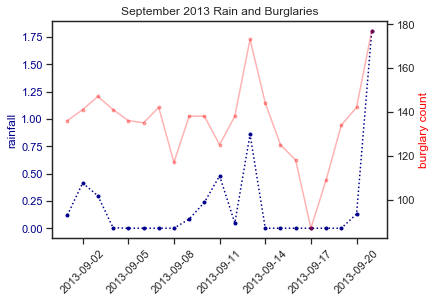

In [82]:
fig, ax1 = plt.subplots()

#ax1.set_xlabel('date')
ax1.set_ylabel('rainfall', color = 'darkblue')
ax1.plot('date', 'precip', data = merged, 
         marker = '.', linestyle = ':', color = 'darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
plt.xticks(rotation = 45)

ax2 = ax1.twinx()
ax2.set_ylabel('burglary count', color = 'red')

ax2.plot('date', 'count', data = merged,
        marker = '.', linestyle = '-', color = 'red', alpha = 0.3)

plt.title('September 2013 Rain and Burglaries');

#### There is a definite suggestion of a relationship (especially on two dates with highest burglary count). More analysis needed! :)

In [41]:
police_2018.tencode_desc.value_counts()

Business Check                                 156142
Traffic Violation                              143257
Want Officer for Investigation / Assistance    126718
Administrative/Special Assignment               41765
Community Policing Activity                     34511
Disorderly Person                               30139
Suspicious Person                               28908
Vehicle Accident - Property Damage              28134
Theft                                           27392
Safety Hazard                                   25581
Burglary - Residence                            19110
Burglary - Non-Residence                        17610
Investigate 911 Hang-Up Call                    14125
Vehicle Accident - Personal Injury               7515
Vehicle Blocking Right of Way                    7510
Fight / Assault                                  6328
Shots Fired                                      4977
Holdup / Robbery                                 3118
Fixed Post                  

In [42]:
sniper = police_2018.loc[police_2018.tencode_desc == 'Sniper']

In [51]:
sniper2 = police_2013.loc[police_2013.tencode_desc == 'Sniper']

In [55]:
snipers = pd.concat([sniper, sniper2])
snipers

,id,call_time,complaint_id,shift,tencode,tencode_desc,disposition,disposition_desc,unit,sector,zone,lat,lng
327273,PD201800384974,04/15/2018 09:26:00 PM,20180338724,B,4000,Sniper,11,DISREGARD / SIGNAL 9,415B,C,21,36.163,-86.776
477160,PD201300524134,05/16/2013 12:49:00 PM,20130464451,A,4000,Sniper,9,SUBJECT WARNED,NaN,H,13,34.153,-92.509


In [56]:
sniper_map = folium.Map(location = [36.1612, -86.7775], zoom_start = 15)

for row in snipers.iterrows():
    vals = row[1]
    location = [vals['lat'], vals['lng']]
    popup = str(vals['tencode_desc']) + ': ' + str(vals['disposition_desc'])
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(sniper_map)

sniper_map

In [49]:
print(location)

[327273    36.163
Name: lat, dtype: float64, 327273   -86.776
Name: lng, dtype: float64]
